<a href="https://colab.research.google.com/github/DengChiung/kmuh20231206/blob/main/test_association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
store_data = pd.read_csv('opopcode_list_dell.csv',encoding = 'big5-hkscs', dtype = str)
store_data['opdept']=store_data['opdept'].str.zfill(4)
#store_data = pd.read_excel('opopcode_list_dell.xls',dtype={'opdept':str})
#store_data=store_data[store_data['opdept']=='0270']#
store_data=store_data[['bopcode1','aopcode1','aopcode2','aopcode3','aopcode4']]
#store_data=store_data[['aopcode1','aopcode2','aopcode3','aopcode4']]
store_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,bopcode1,aopcode1,aopcode2,aopcode3,aopcode4
0,67051B,67051B,67048B,NaN,NaN
1,67051B,67051B,6215052,NaN,NaN
2,80425C,80425C,NaN,NaN,NaN
3,80203C,80203C,NaN,NaN,NaN
4,600142,600142,NaN,NaN,NaN


In [165]:
unique_li = [store_data[col].unique().tolist() for col in store_data.columns]
items = set([item for item_li in unique_li for item in item_li if item is not np.NaN ])
#items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
#OneHotEncoding item_rows
encoded_vals = []

for index, row in store_data.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc_item in uncommons:
        labels[uc_item] = 0
    for com_item in commons:
        labels[com_item] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
display(ohe_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,79403B,62020B,48001C1,82013B,39006C,63007B,50019C,73043B,6215056,83079B,...,68015B,IRB001,62010C,84008B,60505213,82007B,83048C,64214B,67051B,67048B
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#Apriori - Reduce the data
freq_items = apriori(ohe_df, min_support=0.02, use_colnames=True, verbose=1)
display(freq_items.head(7))
display(freq_items.tail(3))

Processing 3 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.027663,(39006C)
1,0.029968,(86415B)
2,0.024435,(19002B)
3,0.036422,(48006C)
4,0.030429,(75215B)
5,0.023513,(77027B)
6,0.025818,(56019B)


,support,itemsets
14,0.025818,(64197C)
15,0.021208,"(86415B, 39006C)"
16,0.020747,"(86415B, 500130)"


In [168]:
#Max, Min values of Support
display(freq_items.sort_values(by = 'support', ascending=False).head(5))
display(freq_items.sort_values(by = 'support', ascending=False).tail(5))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
10,0.067773,(32026C)
11,0.063163,(47080B)
3,0.036422,(48006C)
8,0.030890,(500130)
4,0.030429,(75215B)


,support,itemsets
12,0.023974,(60506113)
5,0.023513,(77027B)
7,0.022591,(28020C)
15,0.021208,"(86415B, 39006C)"
16,0.020747,"(86415B, 500130)"


In [169]:
#Association Rules
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5).sort_values(by = ['lift', 'confidence', 'support'], ascending =False)
print('rules.shape :', rules.shape)
display(rules.head(10))
display(rules.tail(10))

rules.shape : (4, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(86415B),(39006C),0.029968,0.027663,0.021208,0.707692,25.583077,0.020379,3.326418,0.990598
1,(39006C),(86415B),0.027663,0.029968,0.021208,0.766667,25.583077,0.020379,4.157281,0.988249
2,(86415B),(500130),0.029968,0.030890,0.020747,0.692308,22.412170,0.019821,3.149608,0.984896
3,(500130),(86415B),0.030890,0.029968,0.020747,0.671642,22.412170,0.019821,2.954189,0.985834


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(86415B),(39006C),0.029968,0.027663,0.021208,0.707692,25.583077,0.020379,3.326418,0.990598
1,(39006C),(86415B),0.027663,0.029968,0.021208,0.766667,25.583077,0.020379,4.157281,0.988249
2,(86415B),(500130),0.029968,0.030890,0.020747,0.692308,22.412170,0.019821,3.149608,0.984896
3,(500130),(86415B),0.030890,0.029968,0.020747,0.671642,22.412170,0.019821,2.954189,0.985834


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


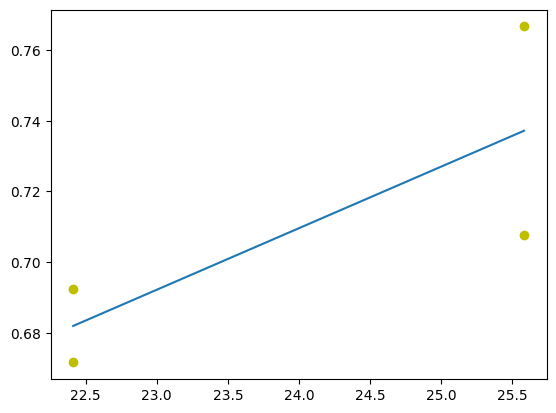

In [170]:

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

In [171]:
rules.iloc[0,0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frozenset({'86415B'})

In [176]:
rules[rules['antecedents']==frozenset({'500130'})].sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(500130),(86415B),0.03089,0.029968,0.020747,0.671642,22.41217,0.019821,2.954189,0.985834


In [174]:
rules[rules['antecedents']==frozenset({'86415B'})].sort_values(by = 'lift', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(86415B),(39006C),0.029968,0.027663,0.021208,0.707692,25.583077,0.020379,3.326418,0.990598
2,(86415B),(500130),0.029968,0.030890,0.020747,0.692308,22.412170,0.019821,3.149608,0.984896
